In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_iris # 3종류의 꽃을 분류
import numpy as np

In [ ]:
iris = load_iris()

In [ ]:
data, target = iris['data'] ,iris['target']

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data, target)

In [ ]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, train_scaled, train_target, cv = 5) # cross_val_score는 교차검증 : 똑같은 모델을 5개 만들고 5개로 나눠서 각 파트에 대해 5번을 평가하고 나온 정확도를 평균낸다.
# cv = 5 이건 모델을 5등분해서 5개의 모델을 각각 테스트하고 평가하는 기능

In [ ]:
np.mean(scores) # 5등분한 것들을 각각 score값을 계산하고, 그들을 평균낸 것

0.9545454545454545

In [ ]:
np.round(np.mean(scores), 2) # 소숫점 2자리에서 반올림

0.95

In [ ]:
# 시뮬레이션 라이브러리 배우기

from sklearn.model_selection import GridSearchCV

param = {"n_neighbors" : range(1, 51)} # 여기서 시뮬레이션 할 모델의 파라미터 이름, 즉 n_neighbors의 이름을 정확히 적어줘야함. 
gs = GridSearchCV(knn, param_grid = param, cv = 5) # param_grid는 GridSearchCV의 파라미터. 이 파라미터로 시뮬레이션을 돌려달라고 요청, cv = 5은 5등분하라는 뜻
gs.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

In [ ]:
gs.best_params_

{'n_neighbors': 3}

In [ ]:
gs.best_score_

0.9545454545454547

In [ ]:
knn = gs.best_estimator_
knn.score(test_scaled, test_target)

0.9736842105263158

In [ ]:
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000785,0.000364,0.002059,0.001146,1,{'n_neighbors': 1},0.913043,1.000000,0.909091,0.909091,0.863636,0.918972,0.044403,18
1,0.000448,0.000005,0.001184,0.000070,2,{'n_neighbors': 2},1.000000,0.956522,0.909091,0.818182,0.863636,0.909486,0.064566,21
2,0.000419,0.000010,0.001120,0.000021,3,{'n_neighbors': 3},1.000000,1.000000,0.909091,0.909091,0.954545,0.954545,0.040656,1
3,0.000421,0.000007,0.001129,0.000024,4,{'n_neighbors': 4},1.000000,1.000000,0.909091,0.909091,0.909091,0.945455,0.044536,8
4,0.000469,0.000063,0.001171,0.000083,5,{'n_neighbors': 5},1.000000,1.000000,0.909091,0.954545,0.909091,0.954545,0.040656,4
5,0.000489,0.000123,0.001572,0.000596,6,{'n_neighbors': 6},1.000000,1.000000,0.909091,0.954545,0.863636,0.945455,0.053009,8
6,0.000491,0.000087,0.001256,0.000238,7,{'n_neighbors': 7},0.956522,1.000000,0.863636,0.954545,0.863636,0.927668,0.054748,13
7,0.000444,0.000019,0.001168,0.000023,8,{'n_neighbors': 8},1.000000,1.000000,0.909091,0.909091,0.863636,0.936364,0.054545,12
8,0.000424,0.000008,0.001133,0.000028,9,{'n_neighbors': 9},0.956522,1.000000,0.909091,0.909091,0.863636,0.927668,0.046593,13
9,0.000429,0.000038,0.001165,0.000081,10,{'n_neighbors': 10},0.956522,1.000000,0.909091,0.909091,0.863636,0.927668,0.046593,13


In [ ]:
# 문자열 데이터를 숫자로 변환

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 원리
box = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

dic = {}
sample = []
for i in box:
    if i not in dic.keys():
        dic[i] = len(dic)
    sample.append(dic[i])

sample

[0, 1, 2, 3, 4, 4, 5, 5]

In [ ]:
dic

{'TV': 0, '냉장고': 1, '믹서': 5, '선풍기': 4, '전자레인지': 2, '컴퓨터': 3}

In [ ]:
# 라벨인코더 라이브러리 이용

le = LabelEncoder()
box2 = le.fit_transform(box)
box2

array([0, 1, 4, 5, 3, 3, 2, 2])

In [ ]:
le.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [ ]:
le.inverse_transform([4,5,2,0,1,1,3,3])

array(['전자레인지', '컴퓨터', '믹서', 'TV', '냉장고', '냉장고', '선풍기', '선풍기'],
      dtype='<U5')

In [ ]:
# 라벨인코더의 주의점
# 여기에서 인덱스, 즉 라벨은 아무 의미가 없는데 숫자가 높은 자료에 가중치를 크게 줘버릴 수 있다.
# 그러므로 선형모델에는 이걸 적용하면 안돼
# 그러므로 선형모델에는 원핫인코딩을 해주어야 한다.
# 원핫인코딩 : 해당값을 1로 하고 나머지 값을 0으로 한다

from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
box3 = np.array(box).reshape(-1,1) # 2차원 행렬 형태로 바꾼다.
oh_label = oh.fit_transform(box3)
oh_label = oh_label.toarray() # oh_label을 다시 array 형태로 바꾸기
oh_label

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
df = pd.DataFrame({
    'item' : box
})
pd.get_dummies(df) # 판다스의 자동 원핫인코딩을 해주는 함수

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [ ]:
pd.get_dummies(df, drop_first = True) # 다 0이면 어차피 나머지 하나는 1이므로 연산량을 줄여준다. 즉 맨 처음것은 당연히 1000000.....

,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0
5,0,0,1,0,0
6,0,1,0,0,0
7,0,1,0,0,0


In [ ]:
from pandas.core.frame import DataFrame
# 표준화하는것
# StandardScaler()는 평균 빼고 표준편차 나누는 정규화 : 이상치에 약하다는 단점
data, target = iris['data'] ,iris['target']
train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

df= DataFrame(train_scaled, columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.062643,2.224660,-1.511705,-1.346156
1,-1.030377,-2.445667,-0.165645,-0.277816
2,2.235724,1.757628,1.707134,1.324694
3,1.147023,-0.577536,0.595172,0.256354
4,-0.062643,-0.811052,0.770745,0.924067
...,...,...,...,...
107,-1.030377,0.590046,-1.394656,-1.346156
108,0.663157,0.356529,0.419599,0.389897
109,0.663157,-0.811052,0.887794,0.924067
110,0.905090,-0.110503,0.361074,0.256354


In [ ]:
df.mean() # 각각의 0들의 평균값을 계산함. 0이 아닌것처럼 보여도 굉장히 작은 절댓값을 가졌기 때문에 0이라 볼 수 있다.ㅇㄹ

sepal length (cm)   -3.600295e-15
sepal width (cm)     6.277221e-16
petal length (cm)   -1.506731e-16
petal width (cm)    -7.335402e-17
dtype: float64

In [ ]:
df.std()

sepal length (cm)    1.004494
sepal width (cm)     1.004494
petal length (cm)    1.004494
petal width (cm)     1.004494
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler # 최댓값을 1로, 최솟값을 0으로 만들어주며 음수가 있을 경우 -1을 최소, 1을 최대로 바꿔준다.
# 이상치에 많이 약하다.너무 많은 압축이 발생해버릴 수도 있음. 숫자가 너무 작아져

data, target = iris['data'] ,iris['target']
train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = MinMaxScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

df= DataFrame(train_scaled, columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.555556,0.318182,0.807018,0.708333
1,0.555556,0.545455,0.807018,0.958333
2,0.555556,0.136364,0.684211,0.583333
3,0.361111,0.318182,0.456140,0.500000
4,0.222222,0.681818,0.087719,0.125000
...,...,...,...,...
107,0.250000,0.590909,0.087719,0.041667
108,0.555556,0.272727,0.719298,0.583333
109,0.555556,0.045455,0.596491,0.500000
110,0.222222,0.727273,0.087719,0.083333


In [ ]:
df.describe() # 최솟값은 0이고 최댓값은 1로 만들어졌다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,0.435764,0.395698,0.486216,0.457961
std,0.224588,0.190384,0.307375,0.313031
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.272727,0.100877,0.083333
50%,0.444444,0.363636,0.596491,0.520833
75%,0.590278,0.500000,0.719298,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import RobustScaler # 평균이 아닌 중앙값으로, 표준편차 대신에 사분위수로 나눈다.
# 이상치에 상대적으로 강하다.강사 생각으로는 얘가 제일 좋대

data, target = iris['data'] ,iris['target']
train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = RobustScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

df= DataFrame(train_scaled, columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.40,-0.380952,0.170213,0.333333
1,0.64,-0.380952,0.113475,0.133333
2,0.56,0.380952,0.085106,0.133333
3,-0.56,0.761905,-0.737589,-0.600000
4,1.52,0.000000,0.680851,0.533333
...,...,...,...,...
107,0.08,-0.761905,-0.056738,-0.066667
108,-0.48,1.523810,-0.652482,-0.600000
109,-0.64,1.142857,-0.794326,-0.800000
110,0.48,0.761905,0.397163,0.733333


In [ ]:
# 이미지 : 데이터가 픽셀값으로 되어있음. 범위는 0~255, 흑백일 경우 0은 검정, 255는 흰색을 보인다.

# 이미지 데이터는 함수를 쓰는 것보단 (픽셀값) / 255를 그냥 쓰는 편. 그냥 255로 나눠버린다.

In [ ]:
# 실습 : 데이터프레임을 iloc을 이용해서 잘라줘서 데이터랑 타겟 설정해야함
# 데이터분할 -> 데이터표준화 -> 최적의 이웃(그리드서치) -> 성능평가
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine # 0은 red wine, 1은 white wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
# 내가 해본거



data = wine.iloc[:, 0:3]
target = wine.iloc[:, -1]

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data, target)
knn = KNeighborsClassifier()
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {"n_neighbors" : range(1, 51)} # 여기서 시뮬레이션 할 모델의 파라미터 이름, 즉 n_neighbors의 이름을 정확히 적어줘야함. 
gs = GridSearchCV(knn, param_grid = param, cv = 5) # param_grid는 GridSearchCV의 파라미터. 이 파라미터로 시뮬레이션을 돌려달라고 요청, cv = 5은 5등분하라는 뜻
gs.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

In [ ]:
knn = gs.best_estimator_
knn.score(test_scaled, test_target)

0.8633846153846154

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 1}
0.8546849892065497


In [ ]:
df = pd.DataFrame(gs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003554,0.000091,0.044888,0.008192,1,{'n_neighbors': 1},0.849231,0.834872,0.854209,0.867556,0.867556,0.854685,0.012279,1
1,0.003619,0.000108,0.041938,0.002215,2,{'n_neighbors': 2},0.815385,0.790769,0.804928,0.831622,0.841889,0.816919,0.018274,50
2,0.003640,0.000086,0.042261,0.001415,3,{'n_neighbors': 3},0.840000,0.832821,0.844969,0.865503,0.849076,0.846474,0.010950,5
3,0.003652,0.000066,0.043559,0.002499,4,{'n_neighbors': 4},0.818462,0.813333,0.832649,0.853183,0.842916,0.832108,0.014832,45
4,0.005431,0.003503,0.044716,0.003865,5,{'n_neighbors': 5},0.840000,0.843077,0.853183,0.865503,0.852156,0.850784,0.008944,2
5,0.003619,0.000061,0.044162,0.001992,6,{'n_neighbors': 6},0.836923,0.830769,0.838809,0.848049,0.847023,0.840315,0.006476,20
6,0.004658,0.002156,0.042844,0.004901,7,{'n_neighbors': 7},0.838974,0.844103,0.848049,0.863450,0.838809,0.846677,0.009067,4
7,0.003578,0.000087,0.043215,0.003090,8,{'n_neighbors': 8},0.833846,0.833846,0.832649,0.850103,0.840862,0.838261,0.006595,24
8,0.003613,0.000064,0.043563,0.001485,9,{'n_neighbors': 9},0.832821,0.844103,0.840862,0.860370,0.844969,0.844625,0.008964,8
9,0.002782,0.000306,0.026981,0.002123,10,{'n_neighbors': 10},0.842051,0.837949,0.834702,0.847023,0.848049,0.841955,0.005128,16


In [ ]:
# 강사 풀이
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine # 0은 red wine, 1은 white wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


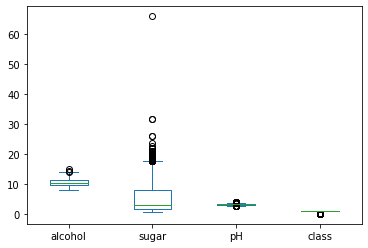

In [ ]:
wine.plot.box()

In [ ]:
data = wine.iloc[:, 0:-1].to_numpy()
target = wine.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
knn = KNeighborsClassifier()
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)


param = {'n_neighbors' : range(1,101)}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid = param, cv = 10) # param_grid는 GridSearchCV의 파라미터. 이 파라미터로 시뮬레이션을 돌려달라고 요청, cv = 5은 5등분하라는 뜻
gs.fit(train_scaled, train_target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 101)})

In [ ]:
gs.best_params_

{'n_neighbors': 1}

In [ ]:
gs.best_score_

0.8666588854305617

In [ ]:
knn = gs.best_estimator_
knn.score(test_scaled, test_target)

0.87

In [ ]:
print(knn.score(train_scaled, train_target)) # 공부한 데이터로 평가를 했으니 당연히 쌉높게 나온다
print(knn.score(test_scaled, test_target))

# 과대 적합되었다. (훈련데이터에 과하게 학습되었다.)

0.9974985568597268
0.8576923076923076


In [ ]:
# 훈련 데이터와 시험 데이터가 둘 다 낮은 경우 : 과소 적합되었다.
# 시험 성적이 더 높은 경우 : 이것도 과소적합되었다고 볼 수 있다. 올바르다면 컴퓨터는 이렇게 될 수 없다. / 혹은 데이터가 잘 일반화가 된 경우도 시험 성적이 높기도 하지만 쉽지 않아
# 데이터가 너무 쉬운 경우에도 시험 성적이 더 높을 수 있음

In [ ]:
# 훈련 데이터가 시험 데이터보다 1~2%정도 높은 경우가 가장 베스트

In [ ]:
# 정확도 : .score를 사용해왔음 -> 이게 과연 정확한 것인가?
# 분야에 따라 필요한 정확도가 다를 수 있다.
# ex) 도미도 잘 맞춰야 하고 빙어도 잘 맞춰야 하는 경우는 정확도를 사용함
# ex) 주식 : 주식이 분류모델이라고 가정. (즉 오를때는 1, 내릴때는 0이라고 하면)올라가는 경우는 잘 못맞추고 떨어지는 경우는 잘 맞춰서 정확도가 높다? 쓰레기 모델임 ㅋㅋㅋㅋㅋㅋ
# 주식 모델은 오른다만 잘 예측하면 된다 -> 이 때는 정밀도를 쓴다 : 양성이라고 예측한 것들 중에서 실제 데이터가 양성인 비율
# 재현율 : 실제 데이터가 양성인 것들 중에서 양성이라고 예측한 것의 비율 (정밀도와 반대) (ex) 프로그램이 100명의 암환자를 예측했는데 실제 암환자 10명이 이 안에 다 들어있기만 하면 100%의 성능이라 보는것

In [ ]:
from sklearn.metrics import accuracy_score, precision_score # precision_score가 정밀도
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred = knn.predict(test_scaled)

accuracy_score(pred, test_target)

0.87

In [ ]:
precision_score(pred, test_target) # 실무에서는 이거 많이 써

0.9101917255297679

In [ ]:
recall_score(pred, test_target)

0.9185336048879837

In [ ]:
# 참고

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=1) # n_jobs=1은 컴퓨터의 코어를 1개만 쓰겠다는 뜻, -1이면 모든 코어를 다 쓰겠다는 뜻

In [ ]:
# 결정 트리 (분류 모델 다른 것의 일종)
# 비정형 데이터는 딥러닝이 최고
# 정형 데이터는 트리 기반이 성능이 잘 나온다. 가장 기초가 되는 것이 결정 트리
# 우승하는 머신러닝 모델들 90%가 트리 기반. 데이터 표준화가 필요 없다.데이터 표준화가 결과에 영향을 아예 안준다. 그런데 데이터 표준화를 안해주면 데이터 설명력을 가질 수 있음

In [ ]:
wine = pd.read_csv("https://bit.ly/wine_csv_data")

data = wine.iloc[:, 0:-1].to_numpy()
target = wine.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # 데이터 표준화는 필요 없다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# 결정 트리는 과대 적합이 굉장히 잘 일어나는 모델이기도 하다. 너무 트리 깊이가 깊어지면 과대적합이 잘 일어난다.


dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.9


[Text(0.5955943875028255, 0.9782608695652174, 'X[1] <= 4.325\ngini = 0.373\nsamples = 5197\nvalue = [1290, 3907]'),
 Text(0.2864871475192134, 0.9347826086956522, 'X[1] <= 1.675\ngini = 0.483\nsamples = 2945\nvalue = [1204, 1741]'),
 Text(0.05562839059674503, 0.8913043478260869, 'X[1] <= 1.375\ngini = 0.195\nsamples = 1052\nvalue = [115, 937]'),
 Text(0.013381555153707052, 0.8478260869565217, 'X[2] <= 3.85\ngini = 0.047\nsamples = 544\nvalue = [13, 531]'),
 Text(0.011934900542495479, 0.8043478260869565, 'X[1] <= 1.175\ngini = 0.036\nsamples = 541\nvalue = [10, 531]'),
 Text(0.00433996383363472, 0.7608695652173914, 'X[2] <= 2.895\ngini = 0.008\nsamples = 260\nvalue = [1, 259]'),
 Text(0.0028933092224231465, 0.717391304347826, 'X[1] <= 0.95\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.0014466546112115732, 0.6739130434782609, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.00433996383363472, 0.6739130434782609, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.005786618444846

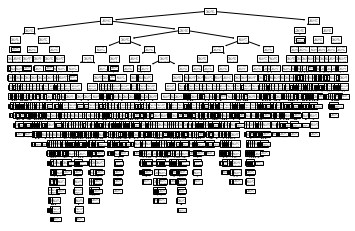

In [ ]:
plot_tree(dt) # 스무고개 모식도를 그려주는 그림. 데이터들이 정확히 나눠질때까지 스무고개를 해나간다.

[Text(0.5, 0.9, 'X[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [37, 43, 40]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'X[3] <= 1.75\ngini = 0.499\nsamples = 83\nvalue = [0, 43, 40]'),
 Text(0.3076923076923077, 0.5, 'X[2] <= 4.95\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]'),
 Text(0.15384615384615385, 0.3, 'X[3] <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8461538461538461, 0.5, 'X[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7692307692307693, 0.3, 'X[0] <

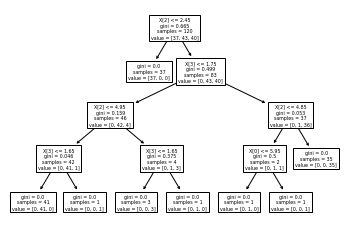

In [ ]:
data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # 데이터 표준화는 필요 없다.
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
plot_tree(dt)

[Text(0.5, 0.9, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [37, 43, 40]\nclass = versicolor'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.7, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 83\nvalue = [0, 43, 40]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5, 'petal length (cm) <= 4.95\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]\nclass = versicolor'),
 Text(0.15384615384615385, 0.3, 'petal width (cm) <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.3, 'petal width (cm) <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]

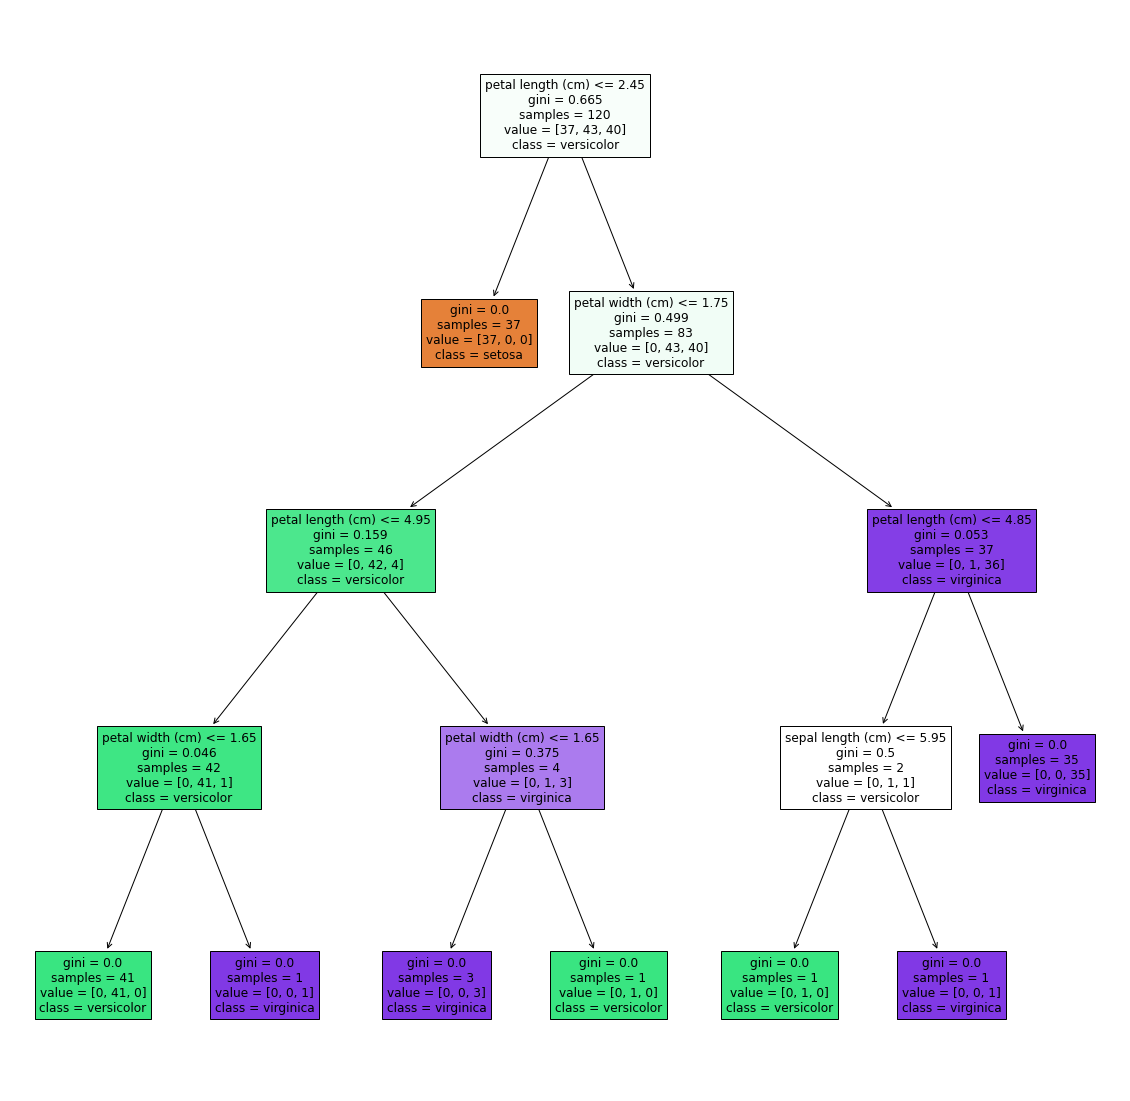

In [ ]:
# 출력되는 그림을 키우는 함수
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
plot_tree(dt, class_names = iris['target_names'], feature_names = iris['feature_names'], filled = True)

In [ ]:
# 결정 트리는 과대 적합이 굉장히 잘 일어나는 모델이기도 하다. 너무 트리 깊이가 깊어지면 과대적합이 잘 일어난다.
# 결정 트리의 과대적합을 막기 위한 파라미터 : max_depth = 최대 깊이 개수, min_samples_split : 노드를 분할하기 위한 최소 샘플 데이터 수 (기본값은 2)
# min_samples_leaf : 말단 노드가 되기 위한 최소 샘플 데이터 수, max_features : 고려하는 특성 개수 (기본값 None)
# max_leaf_nodes : 말단 노드의 최대 개수


dt = DecisionTreeClassifier()

param = {"max_depth" : range(1,11), "min_samples_split" : [2,3,4,5,6,7], "min_samples_leaf" : [3,4,5,6]}
gs = GridSearchCV(dt, param_grid = param, cv = 5)
gs.fit(train_input, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [ ]:
gs.best_params_

{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [ ]:
gs.best_score_

0.9666666666666666

[Text(0.5, 0.8333333333333334, 'sugar <= 3.475\ngini = 0.376\nsamples = 5197\nvalue = [1302, 3895]'),
 Text(0.25, 0.5, 'sugar <= 1.675\ngini = 0.49\nsamples = 2735\nvalue = [1175, 1560]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.201\nsamples = 1044\nvalue = [118, 926]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.469\nsamples = 1691\nvalue = [1057, 634]'),
 Text(0.75, 0.5, 'sugar <= 6.15\ngini = 0.098\nsamples = 2462\nvalue = [127, 2335]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.241\nsamples = 655\nvalue = [92, 563]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.038\nsamples = 1807\nvalue = [35, 1772]')]

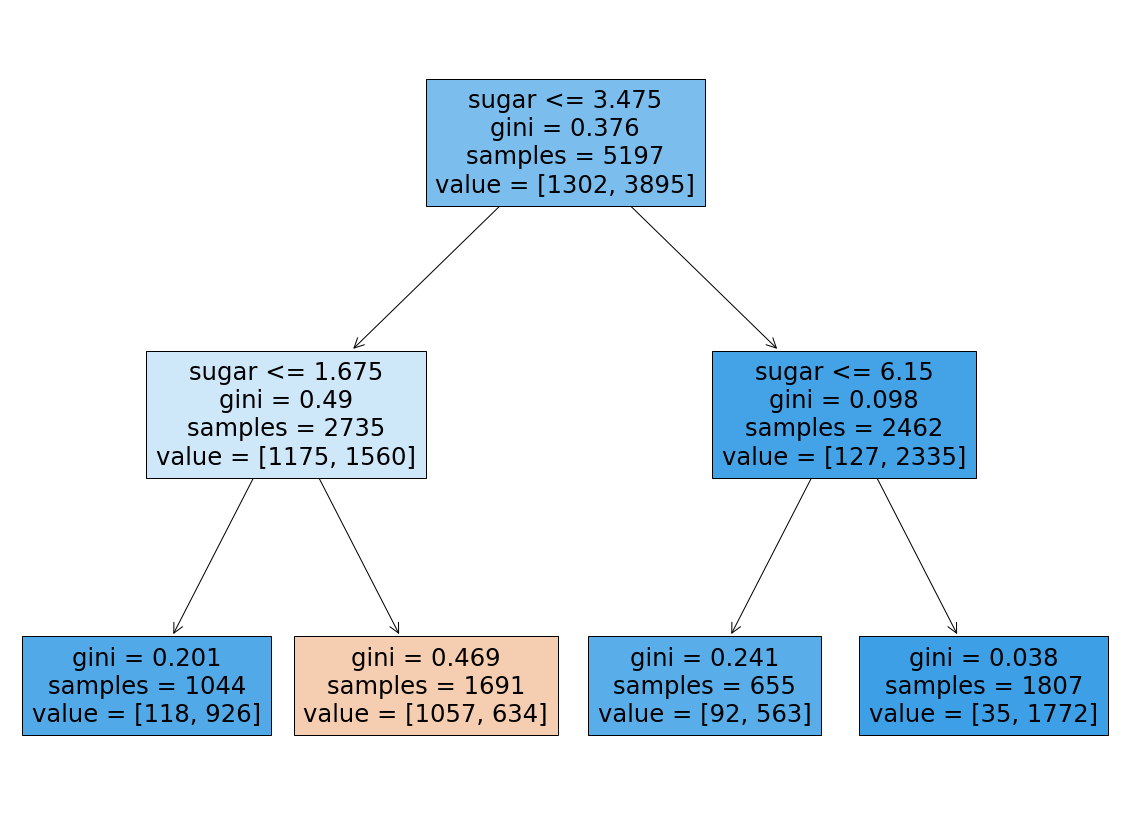

In [ ]:
wine = pd.read_csv("https://bit.ly/wine_csv_data")

data = wine.iloc[:, 0:-1].to_numpy()
target = wine.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # 데이터 표준화는 필요 없다.
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(train_input, train_target)
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
plot_tree(dt, feature_names = ['alcohol', 'sugar', 'pH'], filled = True)

In [ ]:
data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # 데이터 표준화는 필요 없다.
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)


DecisionTreeClassifier()

In [ ]:
dt.feature_importances_ # 특성마다의 가중치를 볼 수 있음

array([0.        , 0.        , 0.51070857, 0.48929143])

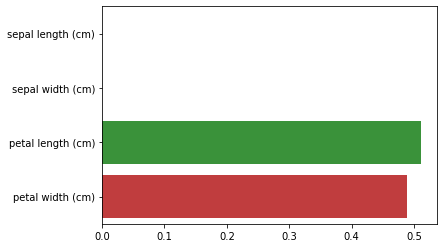

In [ ]:
import seaborn as sns
sns.barplot(x = dt.feature_importances_, y=iris['feature_names'])

In [ ]:
# 결정 트리 기반 대표적인 방법 : 배깅, 부스팅
# 배깅 : 랜덤 포레스트
# 부스팅 : xgboost
# 배깅 : 결정트리를 여러개 그리고, 여러개의 데이터 세트를 중복을 허용하여 중첩되게 분리하여 학습
# 부스팅 : 잘못 예측된 데이터에 가중치를 부여해 오류를 개선해나가면서 학습 -> 이게 조금 더 좋다고 알려져 있음

In [ ]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier
data, target = iris['data'], iris['target']
# train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # 데이터 표준화는 필요 없다.

# n_estimators : 10 / 결정트리 개수 / 시간이 오래 걸릴 수 있음
rf = RandomForestClassifier(n_estimators = 100, oob_score=True)
rf.fit(data, target) # 랜덤 포래스트는 학습을 시킬 때 전체 데이터로 학습을 시켜도 랜덤으로 여러번 학습하기 때문에 한번도 선택되지 않는 경우가 있음. 걔네로 테스트를 하면 더 좋겠자?
rf.oob_score_        # oob_score=True라고 하면 한번도 사용하지 않은 데이터로 테스트 가능

0.9533333333333334

In [ ]:
# 600만개의 데이터로 학습하면 2일정도 걸렸다는 강사의 경험
import pickle
f = open('RandomForest.dat', 'wb')
pickle.dump(rf, f)
f.close

<function BufferedWriter.close>

In [ ]:
rf.feature_importances_

array([0.09301995, 0.02597414, 0.39771814, 0.48328777])

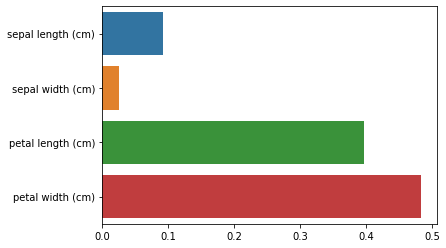

In [ ]:
import seaborn as sns
sns.barplot(x = rf.feature_importances_, y=iris['feature_names'])

In [ ]:
# voting 방법 -> 여러 모델을 쓰고 그 중 다수결로 결과를 가져온다.
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier()
df = DecisionTreeClassifier()
rf = RandomForestClassifier()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2) # 데이터 표준화는 필요 없다.
# voting = 'hard' 아니면 'soft'의 의미
# hard : 무지성 투표
# soft : 평균
voting = VotingClassifier(estimators=[("1번 모델 KNN", knn), ("2번 모델 DT", df), ("Random", rf)], voting = 'hard')
voting.fit(train_input, train_target) # 어차피 결정트리나 랜덤포레스트에 표준화된 데이터 넣어도 성능 변화는 거의 없지만 knn에는 표준화된 데이터를 넣어주어야 하므로 걍 표준화해서 넣어주자
voting.score(test_input,test_target)

0.9666666666666667

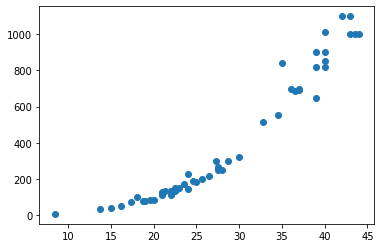

In [ ]:
f = open("perch.dat", 'rb')
perch = pickle.load(f)
f.close()

plt.scatter(perch[0], perch[1])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

data = perch[0].reshape(-1,1)
train_input, test_input, train_target, test_target = train_test_split(data, perch[1])

In [ ]:
knn_r = KNeighborsRegressor()
knn_r.fit(train_input, train_target)
knn_r.score(test_input,test_target) # 이 값은 R^2이다. 즉, 예측값의 분산/실제값의 분산

0.9645394284423474

In [ ]:
knn_r.predict([[33]]) # 무게가 33일때의 길이를 예측하는 과정

array([629.])

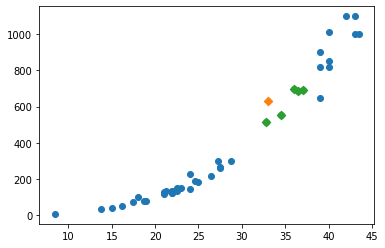

In [ ]:
distance, idx = knn_r.kneighbors([[33]])

plt.scatter(train_input, train_target)
plt.scatter(33, 629, marker = 'D')
plt.scatter(train_input[idx], train_target[idx], marker = 'D')

In [ ]:
knn_r.predict([[50]])

array([1004.])

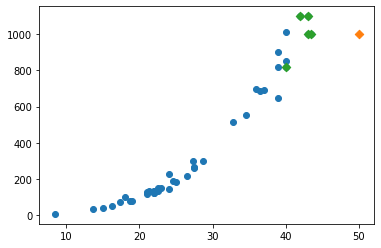

In [ ]:
distance, idx = knn_r.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(50, 1004, marker = 'D')
plt.scatter(train_input[idx], train_target[idx], marker = 'D')

In [ ]:
knn_r.predict([[500]])

array([1004.])

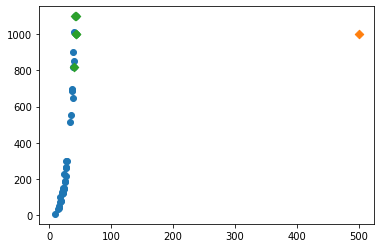

In [ ]:
distance, idx = knn_r.kneighbors([[500]])

plt.scatter(train_input, train_target)
plt.scatter(500, 1004, marker = 'D')
plt.scatter(train_input[idx], train_target[idx], marker = 'D')

In [ ]:
# 즉, kneighbors는 주어진 데이터셋 범위 이내에 것만 정확하고 범위가 크게 벗어나버리면 예측이 너무 크게 틀려. 이를 보완한게 선형회귀
# 즉, 선형회귀는 유사한 일차함수가 아니라 함수 자체를 찾아주는것

In [ ]:
# 선형회귀

from sklearn.linear_model import LinearRegression
data = perch[0].reshape(-1,1)
train_input, test_input, train_target, test_target = train_test_split(data, perch[1])

lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(test_input,test_target)

0.9278773621697365

In [ ]:
lr.coef_ # 기울기

array([36.47499351])

In [ ]:
lr.intercept_ # 절편

-633.3580993684428

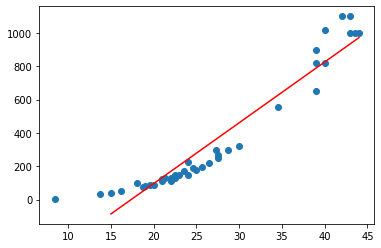

In [ ]:
plt.scatter(train_input, train_target)
plt.plot(range(15,45), lr.coef_*range(15,45) + lr.intercept_, 'r') # 직선을 그리면 당연히 정확도는 떨어진다. 곡선을 그려야지!

In [ ]:
x1 = np.array([2,4,6,8])
y = np.array([30,75,65,90])
a1 = 0
b = 0
lr = 0.005 # learning rate

for n in range(3000):
    y_hat = a1 * x1 +  b
    error = y_hat - y
    
    a1_diff = sum(2 * error * x1)
    b_diff = sum(2 * error * 1)

    a1 = a1 - a1_diff*lr
    b = b - b_diff*lr

    print('{}회 학습/ 기울기 {}/ 절편 {}'.format(n+1, a1, b))

1회 학습/ 기울기 14.700000000000001/ 절편 2.6
2회 학습/ 기울기 11.240000000000002/ 절편 2.156
3회 학습/ 기울기 12.0208/ 절편 2.4217599999999995
4회 학습/ 기울기 11.811487999999999/ 절편 2.5207295999999997
5회 학습/ 기울기 11.83355648/ 절편 2.657602816
6회 학습/ 기울기 11.8017681408/ 절편 2.7845874073599997
7회 학습/ 기울기 11.782728890368/ 절편 2.9128502829056
8회 학습/ 기울기 11.76088416534528/ 절편 3.039790493515776
9회 학습/ 기울기 11.739865068227788/ 절편 3.1660220407060886
10회 학습/ 기울기 11.718822578213226/ 절편 3.2914081454322877
11회 학습/ 기울기 11.697953855270898/ 절편 3.415987303972351
12회 학습/ 기울기 11.677211768151349/ 절편 3.5397570407592776
13회 학습/ 기울기 11.656606238217874/ 절편 3.6627244054986368
14회 학습/ 기울기 11.636133871256698/ 절편 3.7848941816351167
15회 학습/ 기울기 11.615794389421637/ 절편 3.9062716401183724
16회 학습/ 기울기 11.595586794091998/ 절편 4.02686189662931
17회 학습/ 기울기 11.575510261855738/ 절편 4.146670061945738
18회 학습/ 기울기 11.555563935239705/ 절편 4.26570120709676
19회 학습/ 기울기 11.535746971532708/ 절편 4.383960371764949
20회 학습/ 기울기 11.51605853134047/ 절편 4.50145256258781
21회 학

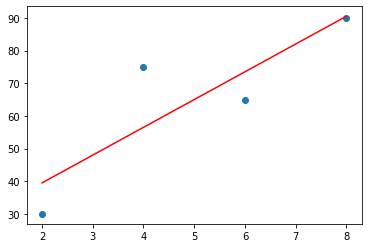

In [ ]:
plt.scatter(x1, y)
plt.plot(x1, a1 * x1 + b, 'r')

In [ ]:
a1 * 9 +b

99.00000003470018

In [ ]:
# 공부 시간만이 성적에 영향을 미치는 요소가 아니므로 이 모델은 정확하지 않음
# 특성이 하나 더 추가되면 3차원의 그림이 그려지겠지... 더 늘어나면 그리지 못하고

In [ ]:
x1 = np.array([2,4,6,8])
x2 = np.array([1,2,1,3]) # 문제집을 푼 개수 # 새로운 특성을 추가한 것.
y = np.array([30,75,65,90])
a1 = 0
a2 = 0
b = 0
lr = 0.005 # learning rate


# 선형 회귀는 특성 하나 더 추가해도 그냥 선형으로 더해주면 된다.
for n in range(3000):
    y_hat = a1 * x1 + a2 * x2 +  b # 이렇게 그냥 선형으로 계속 더해주자
    error = y_hat - y
    
    a1_diff = sum(2 * error * x1)
    a2_diff = sum(2 * error * x2) # 이렇게 그냥 선형으로 계속 더해주자
    b_diff = sum(2 * error * 1)

    a1 = a1 - a1_diff*lr
    a2 = a2 - a2_diff*lr # 이렇게 그냥 선형으로 계속 더해주자
    b = b - b_diff*lr

    print('{}회 학습/ 기울기 a1 {}/ 기울기 a2 {} / 절편 {}'.format(n+1, a1, a2, b))

1회 학습/ 기울기 a1 14.700000000000001/ 기울기 a2 5.15 / 절편 2.6
2회 학습/ 기울기 a1 9.18/ 기울기 a2 3.4654999999999996 / 절편 1.7954999999999999
3회 학습/ 기울기 a1 11.1187/ 기울기 a2 4.2979899999999995 / 절편 2.245095
4회 학습/ 기울기 a1 10.308045/ 기울기 a2 4.19865485 / 절편 2.2306919
5회 학습/ 기울기 a1 10.512790680000002/ 기울기 a2 4.4394901895 / 절편 2.3859493845000004
6회 학습/ 기울기 a1 10.344455911299999/ 기울기 a2 4.551433932159999 / 절편 2.477188959855
7회 학습/ 기울기 a1 10.315097452905/ 기울기 a2 4.70753325062615 / 절편 2.5906098439496
8회 학습/ 기울기 a1 10.23584524037862/ 기울기 a2 4.844021592793755 / 절편 2.6944386320667855
9회 학습/ 기울기 a1 10.176334588393416/ 기울기 a2 4.984469553478569 / 절편 2.800410527212827
10회 학습/ 기울기 a1 10.110863155487323/ 기울기 a2 5.1202365481945185 / 절편 2.9042143197021306
11회 학습/ 기울기 a1 10.048889885684302/ 기울기 a2 5.254560801391262 / 절편 3.0074565574429646
12회 학습/ 기울기 a1 9.986906390818042/ 기울기 a2 5.386298767887845 / 절편 3.1095610619109975
13회 학습/ 기울기 a1 9.926187002299054/ 기울기 a2 5.515922122043682 / 절편 3.2107564275188
14회 학습/ 기울기 a1 9.86624246

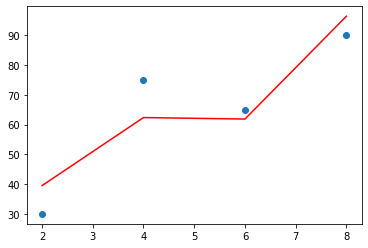

In [ ]:
plt.scatter(x1, y)
plt.plot(x1, a1 * x1 + a2 * x2 +  b, 'r')

In [ ]:
a1 * 3 + a2 * 2 + b # 3시간동안 2개의 문제집을 풀었을 때 성적을 예측한 결과

56.749999892241824

In [ ]:
# 딥러닝에서는 60만개의 기울기를 학습시킨다. 원리는 똑같아!

In [ ]:
# 선형회귀로 구한 y를 시그모이드 함수에 넣게 되면 확률값을 구할 수 있다.
# 로지스틱 회귀 -> 분류 모델이다. y값을 시그모이드에 넣고 0.5보다 크면 1이고 0.5보다 작으면 0이 된다.
# 일단 KNeighborsClassifier로 확률을 적용해보자.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

wine = pd.read_csv("https://bit.ly/wine_csv_data")

data = wine.iloc[:, 0:-1].to_numpy()
target = wine.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_input, train_target)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.predict(test_input[:10])

array([1., 1., 1., 1., 1.])

In [ ]:
# 나올 수 있는 확률이 0, 1/3, 2/3, 1 뿐이다. 애매하네
knn.predict_proba(test_input[20:40])

array([[0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [ ]:
from sklearn.linear_model import LogisticRegression


wine = pd.read_csv("https://bit.ly/wine_csv_data")

data = wine.iloc[:, 0:-1].to_numpy()
target = wine.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

knn = LogisticRegression()
knn.fit(train_input, train_target)
knn.predict(test_input[:10])

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 0.])

In [ ]:
knn.predict_proba(test_input[0:10])

array([[0.00822801, 0.99177199],
       [0.06662322, 0.93337678],
       [0.30636219, 0.69363781],
       [0.56211546, 0.43788454],
       [0.7281305 , 0.2718695 ],
       [0.12246399, 0.87753601],
       [0.05187583, 0.94812417],
       [0.01069989, 0.98930011],
       [0.51194608, 0.48805392],
       [0.55545343, 0.44454657]])

In [ ]:
for i in knn.predict_proba(test_input[0:10]):
    if i[1] > 0.8: # 정밀도를 높이는 방법. 화이트와인일 확률이 0.8 이상인 것만 고른다는 것.
        print(i[1]) # 화이트와인일 확률을 프린트 하는 중임.

0.991771993691419
0.9333767845037194
0.8775360122893786
0.948124169038195
0.9893001119514403


In [ ]:
fifa = pd.read_csv("FIFA.csv")
fifa

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [ ]:
del fifa['id']
del fifa['name']

fifa['contract_until'] = fifa['contract_until'].str[-4:].astype(int)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 697.9+ KB


In [ ]:
# 라벨 인코더는 선형 회귀 모델에서는 쓰면 안돼. 가중치가 달라져버려..... 인덱스는 의미가 없는 값이거든
fifa2 = pd.get_dummies(fifa, drop_first = True) # 원핫인코딩을 하는 것
# 트리기반은 원핫인코딩 안해도 된다. 즉 정형데이터는 트리 기반이 최고야!
fifa2

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value,continent_asia,continent_europe,continent_oceania,continent_south america,position_GK,position_MF,position_ST,prefer_foot_right
0,31,2021,5.0,94,94,4.0,110500000.0,0,0,0,1,0,0,1,0
1,27,2020,4.0,91,93,1.0,72000000.0,0,1,0,0,1,0,0,1
2,31,2021,5.0,91,91,3.0,80000000.0,0,0,0,1,0,0,1,1
3,32,2020,4.0,91,91,3.0,51000000.0,0,1,0,0,0,0,0,1
4,25,2021,3.0,90,93,1.0,68000000.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,2019,1.0,48,63,3.0,60000.0,0,0,0,0,0,1,0,1
8928,19,2020,1.0,47,59,2.0,40000.0,0,1,0,0,0,0,0,1
8929,18,2021,1.0,47,64,2.0,50000.0,0,0,0,1,0,0,0,1
8930,18,2021,1.0,47,65,1.0,50000.0,0,1,0,0,1,0,0,1


In [ ]:
# K최근접회귀, 선형회귀, 랜덤포레스트회귀 해보자!
# 내가 해본 실습
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 선형회귀,
data = pd.concat([fifa2.iloc[:, 0:6],fifa2.iloc[:, 7:]], axis = 1).to_numpy()
target = fifa2['value'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

knn = LinearRegression()
knn.fit(train_input, train_target)
knn.score(test_input, test_target)

0.6352483161379359

In [ ]:
# K최근접회귀,
data = pd.concat([fifa2.iloc[:, 0:6],fifa2.iloc[:, 7:]], axis = 1).to_numpy()
target = fifa2['value'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

knn = KNeighborsRegressor()
knn.fit(train_input, train_target)
knn.score(test_input, test_target)

0.9839280503697972

In [ ]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestRegressor
data = pd.concat([fifa2.iloc[:, 0:6],fifa2.iloc[:, 7:]], axis = 1).to_numpy()
target = fifa2['value'].to_numpy()

rf = RandomForestRegressor(n_estimators = 100, oob_score=True)
rf.fit(data, target) 
rf.oob_score_   

0.977523358906425

In [ ]:
# 강사님 풀이
fifa2 = pd.get_dummies(fifa, drop_first = True)
data = fifa2.loc[:, fifa2.columns != 'value'].to_numpy()
target = fifa2['value'].to_numpy()

In [ ]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestRegressor
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
rf = RandomForestRegressor()
rf.fit(train_input, train_target)
rf.score(test_input, test_target)

0.9664872217271182

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
rf = LinearRegression()
rf.fit(train_input, train_target)
rf.score(test_input, test_target)

0.6329528408365475

In [ ]:
# K최근접회귀
from sklearn.neighbors import KNeighborsRegressor
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)
rf = KNeighborsRegressor()
rf.fit(train_input, train_target)
rf.score(test_input, test_target)

0.9809885617147287

In [ ]:
# 크롤링 해서 주가 예측
# 내가 해본거 .... 아직 부족해

from bs4 import BeautifulSoup # python으로 HTML을 다루는 기능
import requests
import time
from tqdm import tqdm


me = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6)"}
url =requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page=1", headers = me) 
html = BeautifulSoup(url.text)
table = html.find('table') #, class_ = 'type_2'를 지워야해
table = pd.read_html(str(table))[0].dropna()
table

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.08.05,61500.0,0.0,61700.0,61900.0,61200.0,9489146.0
2,2022.08.04,61500.0,200.0,61700.0,61800.0,61200.0,9125439.0
3,2022.08.03,61300.0,400.0,61600.0,61600.0,61000.0,10053861.0
4,2022.08.02,61700.0,400.0,61200.0,61900.0,61000.0,13614895.0
5,2022.08.01,61300.0,100.0,61000.0,61700.0,60300.0,13154816.0
9,2022.07.29,61400.0,500.0,62400.0,62600.0,61300.0,15093120.0
10,2022.07.28,61900.0,100.0,62300.0,62600.0,61600.0,10745302.0
11,2022.07.27,61800.0,100.0,61300.0,61900.0,61200.0,7320997.0
12,2022.07.26,61700.0,600.0,60800.0,61900.0,60800.0,6597211.0
13,2022.07.25,61100.0,200.0,60900.0,61900.0,60800.0,9193681.0


In [ ]:
from bs4 import BeautifulSoup # python으로 HTML을 다루는 기능
import requests
import time
from tqdm import tqdm
me = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6)"}

total = []
for n in tqdm(range(1,657)):
   
    url =requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page={}".format(n), headers = me) 
    html = BeautifulSoup(url.text)
    table = html.find('table')
    table = pd.read_html(str(table))[0].dropna()
    total.append(table)
    time.sleep(0.5)

100%|██████████| 656/656 [14:29<00:00,  1.33s/it]


In [ ]:
samsung = pd.concat(total, ignore_index=True) # 모든 데이터 합치기
samsung

,날짜,종가,전일비,시가,고가,저가,거래량
0,2022.08.05,61500.0,0.0,61700.0,61900.0,61200.0,9487947.0
1,2022.08.04,61500.0,200.0,61700.0,61800.0,61200.0,9125439.0
2,2022.08.03,61300.0,400.0,61600.0,61600.0,61000.0,10053861.0
3,2022.08.02,61700.0,400.0,61200.0,61900.0,61000.0,13614895.0
4,2022.08.01,61300.0,100.0,61000.0,61700.0,60300.0,13154816.0
...,...,...,...,...,...,...,...
6552,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
6553,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
6554,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
6555,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0


In [ ]:
samsung2 = samsung[::-1]
samsung2 # 현재부터 과거로 가고 있기 때문에 인덱스 뒤집기 해야해

,날짜,종가,전일비,시가,고가,저가,거래량
6556,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
6555,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
6554,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
6553,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
6552,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
4,2022.08.01,61300.0,100.0,61000.0,61700.0,60300.0,13154816.0
3,2022.08.02,61700.0,400.0,61200.0,61900.0,61000.0,13614895.0
2,2022.08.03,61300.0,400.0,61600.0,61600.0,61000.0,10053861.0
1,2022.08.04,61500.0,200.0,61700.0,61800.0,61200.0,9125439.0


In [ ]:
samsung2.index = range(len(samsung2)) # 인덱스 재설정
samsung2

,날짜,종가,전일비,시가,고가,저가,거래량
0,1996.06.25,67500.0,0.0,66500.0,68300.0,65600.0,112960.0
1,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
2,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
3,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
4,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...,...
6552,2022.08.01,61300.0,100.0,61000.0,61700.0,60300.0,13154816.0
6553,2022.08.02,61700.0,400.0,61200.0,61900.0,61000.0,13614895.0
6554,2022.08.03,61300.0,400.0,61600.0,61600.0,61000.0,10053861.0
6555,2022.08.04,61500.0,200.0,61700.0,61800.0,61200.0,9125439.0


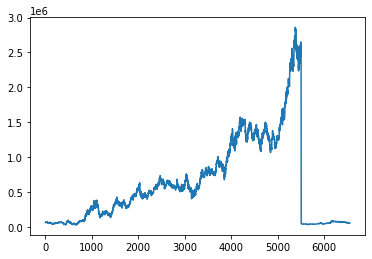

In [ ]:
plt.plot(samsung2['종가'])

In [ ]:
# 전일비는 지우자. 이거는 없애는게 좋대 뭔지는 몰라 ㅋㅋㅋ
del samsung2['전일비']


,날짜,종가,시가,고가,저가,거래량
0,1996.06.25,67500.0,66500.0,68300.0,65600.0,112960.0
1,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0
2,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
3,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
4,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
6552,2022.08.01,61300.0,61000.0,61700.0,60300.0,13154816.0
6553,2022.08.02,61700.0,61200.0,61900.0,61000.0,13614895.0
6554,2022.08.03,61300.0,61600.0,61600.0,61000.0,10053861.0
6555,2022.08.04,61500.0,61700.0,61800.0,61200.0,9125439.0


In [ ]:
data = []
target = []
for i in range(len(samsung2) - 1 ):
    a = list(samsung2.iloc[i, 1:])
    b = samsung2.iloc[i+1, 1]
    data.append(a)
    target.append(b)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(data, target)

RandomForestRegressor()

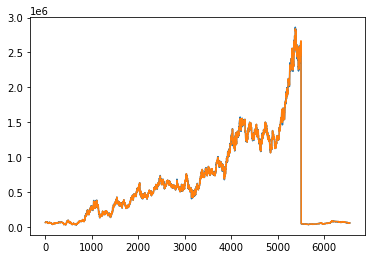

In [ ]:
plt.plot(target)
plt.plot(rf.predict(data))

In [ ]:
rf.predict([[61500.0,61700.0,61900.0,61200.0,9487947.0]])

array([61285.])

In [ ]:
samsung2

,날짜,종가,시가,고가,저가,거래량
0,1996.06.25,67500.0,66500.0,68300.0,65600.0,112960.0
1,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0
2,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
3,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
4,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
6552,2022.08.01,61300.0,61000.0,61700.0,60300.0,13154816.0
6553,2022.08.02,61700.0,61200.0,61900.0,61000.0,13614895.0
6554,2022.08.03,61300.0,61600.0,61600.0,61000.0,10053861.0
6555,2022.08.04,61500.0,61700.0,61800.0,61200.0,9125439.0


In [ ]:

samsung2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6557 non-null   object 
 1   종가      6557 non-null   float64
 2   시가      6557 non-null   float64
 3   고가      6557 non-null   float64
 4   저가      6557 non-null   float64
 5   거래량     6557 non-null   float64
dtypes: float64(5), object(1)
memory usage: 307.5+ KB


In [ ]:
samsung2['날짜'] = pd.to_datetime(samsung2['날짜'],format='%Y.%m.%d')
samsung2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6557 non-null   datetime64[ns]
 1   종가      6557 non-null   float64       
 2   시가      6557 non-null   float64       
 3   고가      6557 non-null   float64       
 4   저가      6557 non-null   float64       
 5   거래량     6557 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 307.5 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train = samsung2[samsung2['날짜'].dt.year !=2022]
test = samsung2[samsung2['날짜'].dt.year ==2022]
# 훈련 데이터는 2021년도부터 이전까지 쭉, 테스트 데이터는 2022년도로 한번 해보자

In [ ]:
data = []
target = []
for i in range(len(train) - 1 ):
    a = list(train.iloc[i, 1:])
    b = train.iloc[i+1, 1]
    data.append(a)
    target.append(b)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(data, target)

RandomForestRegressor()

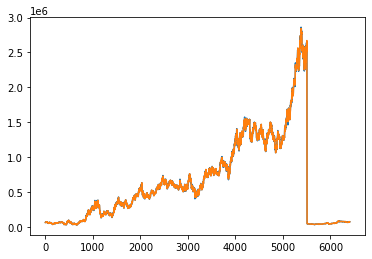

In [ ]:
plt.plot(target)
plt.plot(rf.predict(data))

In [ ]:
data = []
target = []
for i in range(len(test) - 1 ):
    a = list(test.iloc[i, 1:])
    b = test.iloc[i+1, 1]
    data.append(a)
    target.append(b)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(data, target)

RandomForestRegressor()

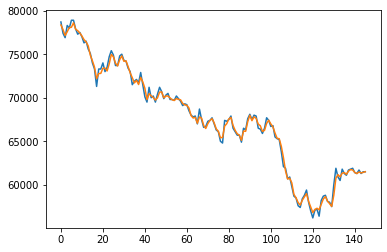

In [ ]:
plt.plot(target)
plt.plot(rf.predict(data))

In [ ]:
rf.predict([[61500.0,61700.0,61900.0,61200.0,9487947.0]])

array([61480.])

In [ ]:
# 데이터를 한 줄씩만 보여주면 주가가 올라가는 중인지 내려가는 중인지 알 수 없어
# 그러므로 배치 사이즈로 여러 줄의 데이터를 묶어서 보여주기도 한다. 근데 이게 또 정답은 아니야. 될지 안될지 몰라
# 다른 주식의 영향도 분명 있을텐데 삼성전자 것만 확인하였기에 정확도가 낮을 수 있음